<a href="https://colab.research.google.com/github/erickhenri/Analise_covid19/blob/main/analise_covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise covid -19

Importando as bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pegando os dados dos arquivos

In [ ]:
dataframe_vaccinations = pd.read_csv('COVID_VACCINATIONS.csv')
dataframe_deaths = pd.read_csv('COVID_DEATHS.csv')

Removendo os dados que não são países

In [ ]:
not_countries = ['World', 'Asia', 'Lower middle income', 'Upper middle income', 'Africa', 'High income', 'Europe', 'Low income', 'North America', 'European Union', 'South America', 'Oceania']
dataframe_deaths = dataframe_deaths[~dataframe_deaths['location'].isin(not_countries)]
dataframe_vaccinations = dataframe_vaccinations[~dataframe_vaccinations['location'].isin(not_countries)]

## 1 Questão - Países que testaram mais pessoas tiveram menos casos positivos de Covid-19?


pegando o total de testes e casos

In [ ]:
new_tests = dataframe_vaccinations[['new_tests', 'location']]
new_cases = dataframe_deaths[['new_cases', 'location']]

testes = new_tests.groupby('location').sum()
cases = new_cases.groupby('location').sum()

Juntando todos os casos em uma única tabela e os ordenando

In [ ]:
testes_by_cases = pd.merge(testes,cases, on='location')
testes_by_cases = testes_by_cases.sort_values(by='new_cases')

Analizando a correlação entre os dados e criando seu gráfico

0.6770329131280588


Text(0, 0.5, 'tests')

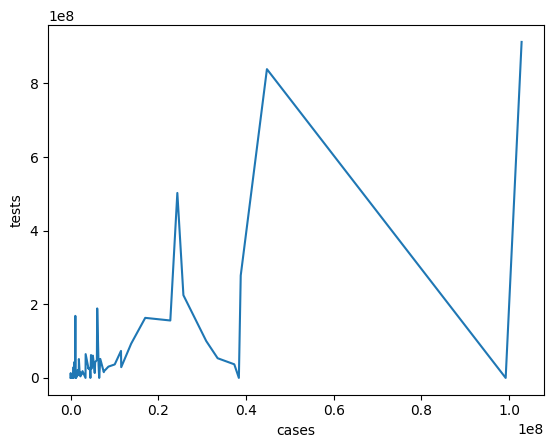

In [ ]:
print(testes_by_cases['new_cases'].corr(testes_by_cases['new_tests']))

plt.plot( testes_by_cases['new_cases'], testes_by_cases['new_tests'])
plt.xlabel('cases')
plt.ylabel('tests')

Conclusão: Pelo corr, aparenta ter uma relação forte e diretamente proporcional entre a quantidade de casos e teste. Um dos motivos pode está relacionado ao fato que de os casos são descobertos principalmente após os testes.

## Questão 2 - A taxa de reprodução do vírus (reproduction_rate) é mais intensa em países mais populosos (population)?


Pegando os dados reproduction_rate e population_density



In [ ]:
reproduction_rate = dataframe_deaths[['reproduction_rate', 'location']]
reproduction_rate = reproduction_rate.groupby('location').sum()

population_density = dataframe_vaccinations[['population_density', 'location']]
population_density = population_density.groupby('location').sum()

Juntando os dados em uma tabela, ordena-os e remove os valores de reproduction_rate iguais a 0


In [ ]:
population_by_reproduction_rate = pd.merge(population_density, reproduction_rate, on='location')

population_by_reproduction_rate = population_by_reproduction_rate.sort_values(by='population_density', ascending=False).dropna()
population_by_reproduction_rate = population_by_reproduction_rate.loc[population_by_reproduction_rate['reproduction_rate'] > 0]

Calcula o corr e cria o gráfico

0.04528065980972752


Text(0, 0.5, 'reproduction_rate')

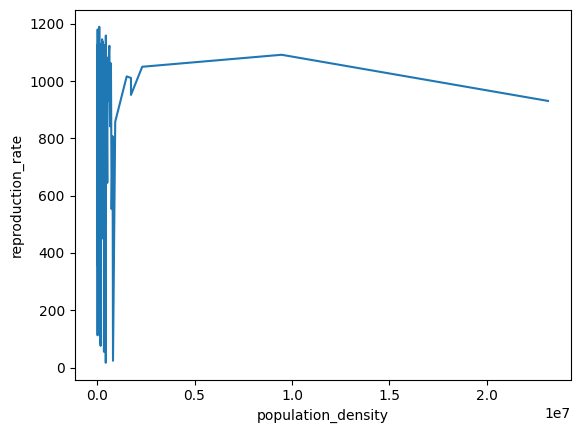

In [ ]:
print(population_by_reproduction_rate['population_density'].corr(population_by_reproduction_rate['reproduction_rate']))
plt.plot( population_by_reproduction_rate['population_density'], population_by_reproduction_rate['reproduction_rate'])
plt.xlabel('population_density')
plt.ylabel('reproduction_rate')

Conclusão: Os dados aparentam não estarem nem um pouco relacionados. Um dos motivos pode ser a incosistência dos dados, como a densidade populacional com 0 ou nula em alguns países ou outros fatores que influenciam diretamente na transmissão do vírus, mas que não foram considerados nessa análise.


## Questão 3 - Qual o top10 países com maior índice de ridigez do pais e qual foi seu nível de infeção por densidade populacional?




Pegandos os dados de de restrição e casos totais

In [ ]:
stringency_by_location = dataframe_vaccinations[['stringency_index','population_density', 'location']]
new_cases = dataframe_deaths[['new_cases','location']]

agrupandos ambas as tabelas

In [ ]:
stringency_by_location_group = stringency_by_location.groupby('location').agg(
    stringency_index_mean = ('stringency_index', 'mean'),
    population_density_mean = ('population_density', 'mean'),
)
stringency_by_location_group = stringency_by_location_group.reset_index()

new_cases_group = new_cases.groupby('location').agg(
    cases_total = ('new_cases', 'sum'),
)
new_cases_group = new_cases_group.reset_index()

Juntando os dados em uma únicas tabela, ordenando-os e removendo seus nulos

In [ ]:
stringency_by_cases = pd.merge(stringency_by_location_group, new_cases_group, on='location')
stringency_by_cases['caso_by_density'] =  stringency_by_cases['cases_total'] / stringency_by_cases['population_density_mean']
stringency_by_cases = stringency_by_cases.sort_values(by='stringency_index_mean', ascending=False)
stringency_by_cases = stringency_by_cases.dropna()

Correlacionando os dados e criando seu gráfico

0.2423119318870622


Text(0, 0.5, 'cases')

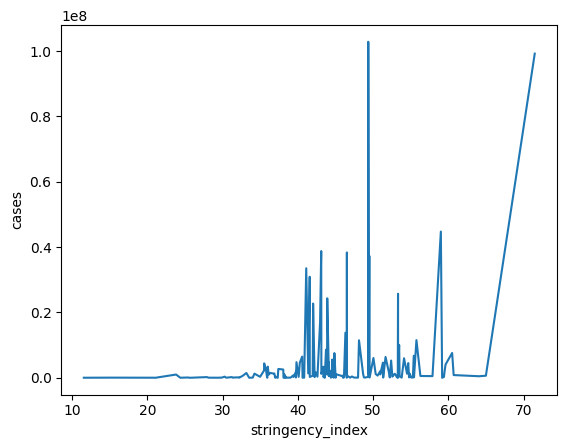

In [ ]:
print(stringency_by_cases['stringency_index_mean'].corr(stringency_by_cases['cases_total']))
plt.plot( stringency_by_cases['stringency_index_mean'], stringency_by_cases['cases_total'])
plt.xlabel('stringency_index')
plt.ylabel('cases')

Conclusão: Os dados nao parecem estar relacionados fortemente. Um dos motivos pode ser a inconsistência dos dados, uma vez que há muitos países com o stringecy ou densidade populacional nulos ou zerados